In [294]:
import numpy as np
import math
import plotly.graph_objects as go
import sympy as sp
from IPython.display import Latex
from plotly.subplots import make_subplots

# Схема Горнера
## Описание алгоритма
$$P(x) = a_0 + a_1x +a_2x^2 + \ldots + a_nx^n, a_i \in \mathbb{R}$$
Пусть требуется вычислить значение данного многочлена при фиксированном значении $x=x_0$.Представим многочлен $P(x)$ в следующем виде:  
$$b_n = a_n,$$
$$b_{n-1} = a_{n-1} +b_{n}x_0,$$  
$$\cdots,$$
$$b_i = a_i + b_{i+1}x_{0},$$  
$$\cdots,$$  
$$b_0 = a_0 + b_1x_0$$

Тогда искомое значание $P(x_0) = b_0$

## Задача
Для многочлена $P_(x) = (x-2)^9$ на интервале $[1.92,2.08],$ с шагом $10^{-4}$ Результат нарисовать. Объяснить полученный результат. Сравнить его с вычислением по формуле $P_(x) = (x_0-2)^9$ Почему алгоритм вычисления данного многочлена по схеме Горнера непригоден для численного опре- деления нуля функции?

## Решение

In [325]:
x = sp.symbols('x')
a = 2
b =9
p = (x-a)**b
p.expand()


 9       8        7        6         5         4         3         2          
x  - 18⋅x  + 144⋅x  - 672⋅x  + 2016⋅x  - 4032⋅x  + 5376⋅x  - 4608⋅x  + 2304⋅x 

     
- 512

In [232]:
x = sp.symbols('x')
p = sp.Poly(sp.expand((x-a)**b))
kof = ([p.coeffs()][0])
display(Latex('$P(x)='+sp.latex(p)+'$'))
kof.reverse()

<IPython.core.display.Latex object>

In [233]:
print(kof)

[-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]


In [260]:

def gorner_metod_1 (x_0,kof,arg):
    
    b= np.zeros(len(kof))
    b[[len(kof)-1]] = kof[len(kof)-1]

    for i in range(len(kof)-2,-1,-1):
        b[i]=kof[i]+b[i+1]*x_0
        if arg ==1:
            display(Latex('$'+'b_'+str(i)+'='+str(kof[i])+'+'+str(b[i+1]*x_0)+'='+str(b[i])+'$')) 
    return b[0]


1.0

### Пример вычисления методом Горнера

In [285]:
x_example = 4
display(Latex('$P(x)='+sp.latex(p)+'$'))
display(Latex('При $x_0 ='+str(x_example)+ '$'))
print('P(',x_example,')= ',(gorner_metod_1(x_example,kof,1)), sep='')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P(4)= 512.0


In [273]:
x_0 = np.arange(1.92,2.08,10**(-4))
print('list x_0 =',x_0)
print(gorner_metod_1(4,kof,0))

list x_0 = [1.92   1.9201 1.9202 ... 2.0798 2.0799 2.08  ]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

512.0


In [339]:
iterable_1 = ((t-a)**b for t in x_0)
iterable_2 = (gorner_metod_1(t,kof,0) for t in x_0)
y_1 = np.fromiter(iterable_1, float)
y_2 = np.fromiter(iterable_2, float)

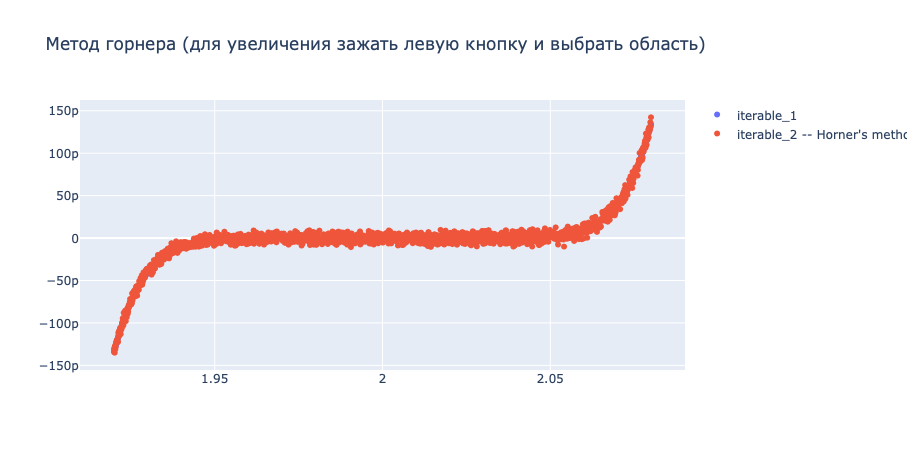

In [327]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x_0,y=y_1,
                    mode='markers',
                    name='iterable_1'))
fig.add_trace(go.Scatter(x = x_0,y=y_2,
                    mode='markers',
                    name='iterable_2 -- Horner\'s method'))
fig.update_layout(
    title=go.layout.Title(
        text="Метод горнера (для увеличения зажать левую кнопку и выбрать область)"
    ))

fig.show()

In [317]:
(y_2-y_1)

array([ 2.96627385e-12,  3.33968500e-12, -3.88895403e-12, ...,
        5.19635266e-12, -1.63438244e-12,  8.11819283e-12])

/Users/pavel/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in true_divide



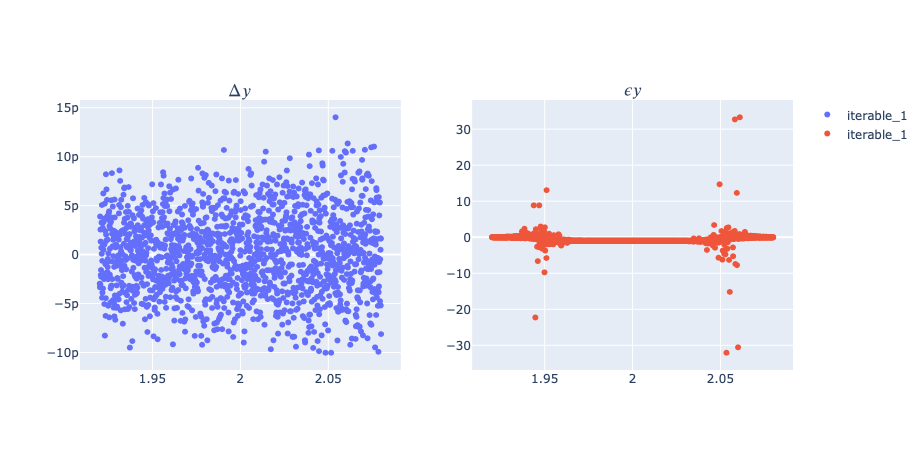

In [315]:
delta_y = (y_1-y_2)
fig = make_subplots(rows=1, cols=2,subplot_titles=("$\Delta y$", "$\epsilon y$"))
fig.add_trace(go.Scatter(x = x_0,y=delta_y,
                    mode='markers',
                    name='iterable_1'),
                    row=1, col=1)

epsilon_y= delta_y/y_2
fig.add_trace(go.Scatter(x = x_0,y=epsilon_y,
                    mode='markers',
                    name='iterable_1'),
                    row=1, col=2)
fig.show()

In [323]:
step_y = np.zeros(len(y_2)-1)
for i in range(0, len(y_2)-1):
    step_y[i]=(y_2[i+1]-y_2[i]/2)


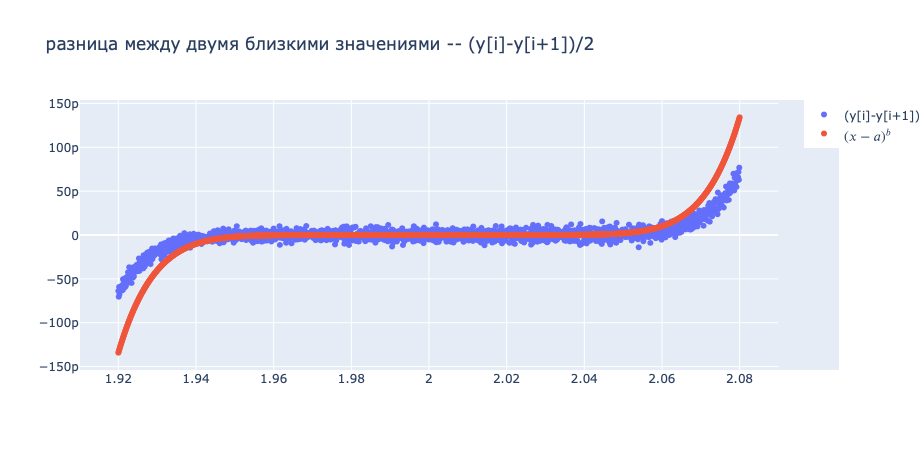

In [331]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x_0,y=step_y,
                    mode='markers',
                    name='(y[i]-y[i+1])/2'))
fig.add_trace(go.Scatter(x = x_0,y=y_1,
                    mode='markers',
                    name='($(x-a)^b$'))
fig.update_layout(
    title=go.layout.Title(
        text="разница между двумя близкими значениями -- (y[i]-y[i+1])/2"
    ))
fig.show()

Иследуем решение при измении a = 2 $\pm\Delta$, $\Delta= 2\cdot 10^{-3}$

In [367]:
delta = 2 * 10**(-3)
iterable_1_2 = ((t-a+delta)**b for t in x_0)
iterable_2_2 = (gorner_metod_1(t,kof,0) for t in x_0)
x = sp.symbols('x')
p = sp.Poly(sp.expand((x-a+delta)**b))
kof = ([p.coeffs()][0])
kof.reverse()
y_2_delta = np.fromiter(iterable_2_2, float)
y_1_delta = np.fromiter(iterable_1_2, float)
y_1_delta

array([-1.06868921e-10, -1.05642123e-10, -1.04427859e-10, ...,
        1.63975790e-10,  1.65788772e-10,  1.67619550e-10])

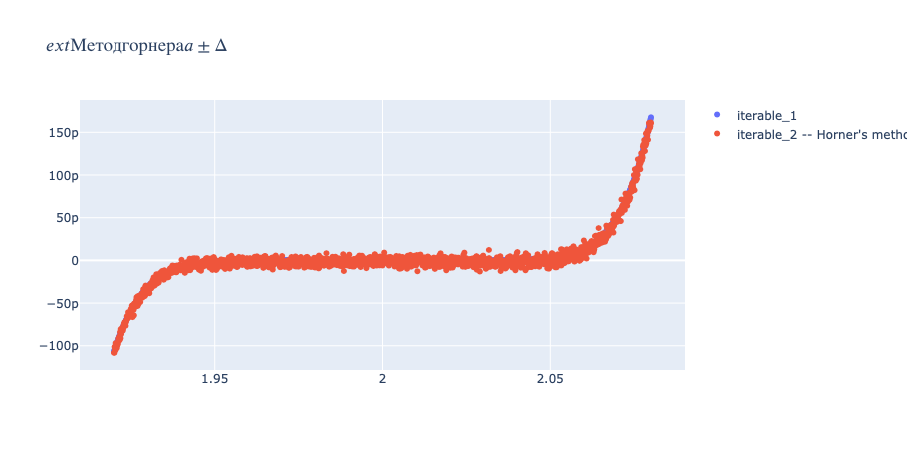

In [361]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x_0,y=y_1_delta,
                    mode='markers',
                    name='iterable_1'))
fig.add_trace(go.Scatter(x = x_0,y=y_2_delta,
                    mode='markers',
                    name='iterable_2 -- Horner\'s method'))
fig.update_layout(
    title=go.layout.Title(
        text="$\text{ Метод горнера } a \pm \Delta$"
    ))

fig.show()

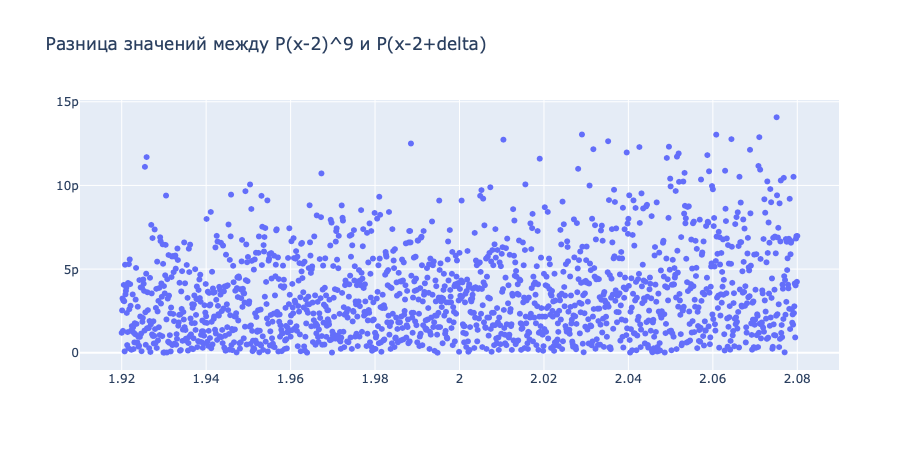

In [362]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x_0,y=abs(y_2_delta-y_1_delta),
                    mode='markers',
                    name='iterable_1'))
fig.update_layout(
    title=go.layout.Title(
        text="Разница значений между методом Горнера и значением"
    ))
fig.show()

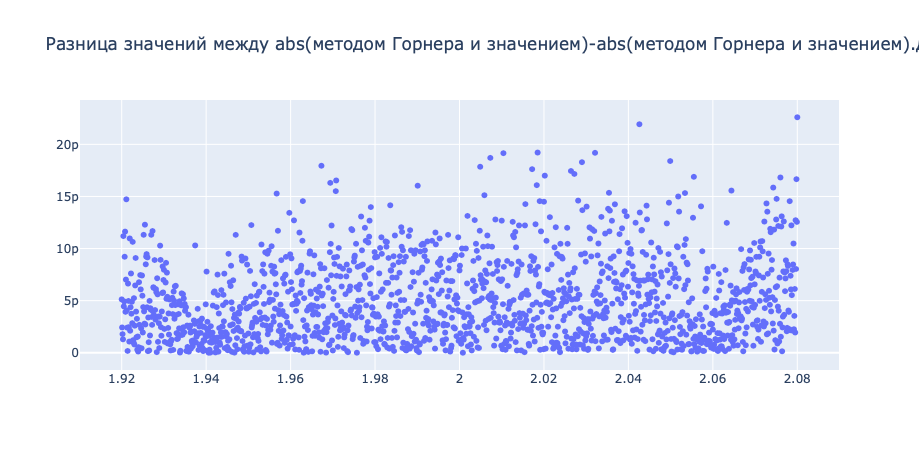

In [369]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x_0,y=abs(abs(y_2_delta-y_2)-abs(y_1_delta-y_1)),
                    mode='markers',
                    name='iterable_1'))
fig.update_layout(
    title=go.layout.Title(
        text="Разница значений между abs(методом Горнера и значением)-abs(методом Горнера и значением).для delta "
    ))
fig.show()

## Вывод
Решение в окрестности корня явлется неустойчивым видно из последнего графика